<br><br>

## Exercício clusterização: clusters RFM

<br>

No exercício a seguir, estudaremos um conceito muito interessante e comum no contexto de dados, os __clusters RFM!__

A sigla __RFM__ vem do inglês, significando __recency, frequency and monetary.__ Em português, recência, frequência e valor monetário.

Essa clusterização é muito comum quando o __objetivo é segmentar clientes de uma certa base__ em termos de:

<br>

__Recência__ de compra: há quantos dias foi feita a última compra, relativo a data atual;

__Freqûencia__ de compra: considerando uma certa janela de tempo, qual a frequência (ou quantidade) de compra;

__Valor monetário__ das compras: qual foi o total gasto, nesta mesma janela de tempo.


<br>

Use a função getData para carregar os dados disponíveis para este exercício.

Esse dataset contém 4 colunas, em que cada linha/istância corresponde a um cliente único de uma certa empresa.

As colunas "rec", "freq" e "valor" indicam a recência, frequência e valor monetário do cliente num período de 120 dias.

Desta forma, por exemplo, um usuário com:

    - recência: 30
    
    - frequência: 5
    
    - valor: 10
    
deve ser interpretado como: um usuário que fez a última compra há 30 dias atrás; que a frequência mensal de compra dele, dentro dos últimos 120 dias foi de 5 vezes; o valor médio gasto, dentro desse período de 120 dias, foi de R$10,00.

<br>

__Exercício:__

Como cientista de dados da empresa, o seu __objetivo__ é __analisar os dados disponíveis__ e procurar pelos __grupos de clientes mais valiosos e menos valiosos__ para a companhia. 

Justifique bastante suas análises e __interprete os resultados.__

Você pode (e deve!) utilizar técnicas de clusterização, como __KMeans__ e __DBSCAN__, bem como criar segmentações a partir de suas __análises exploratórias.__

Lembre-se que, neste contexto não supervisionado, não existe resposta certa e a __criatividade__ é fundamental!

__Obs.:__ Ao utilizar o KMeans e o DBSCAN, lembre-se de normalizar os dados antes de aplicar os algoritmos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def getData():
    return pd.read_csv("dataframe_exercicio_clusterizacao_RFM.csv")

In [2]:
df = getData()
df

,user,rec,freq,valor
0,1,15.0,7.0,196.881015
1,2,51.0,6.0,162.408892
2,3,80.0,5.0,180.158644
3,4,38.0,4.0,156.048130
4,5,19.0,6.0,164.052067
...,...,...,...,...
1007,1008,50.0,6.0,116.867455
1008,1009,72.0,4.0,94.807854
1009,1010,50.0,5.0,99.187523
1010,1011,81.0,2.0,66.581900


**Normalização Dados**

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xsc = sc.fit_transform(df.values[:, 1:])

In [32]:
pd.set_option('display.max_rows', None)
viz_xsc = pd.DataFrame(Xsc)
viz_xsc.columns = ['rec', 'freq', 'valor_compra']
viz_xsc.head()

,rec,freq,valor_compra
0,-1.136298,1.021841,0.698766
1,0.224346,0.609025,0.422883
2,1.320421,0.196210,0.564936
3,-0.266997,-0.216606,0.371977
4,-0.985115,0.609025,0.436033


**Curva de Elbow para definição da quantidade de clusters**

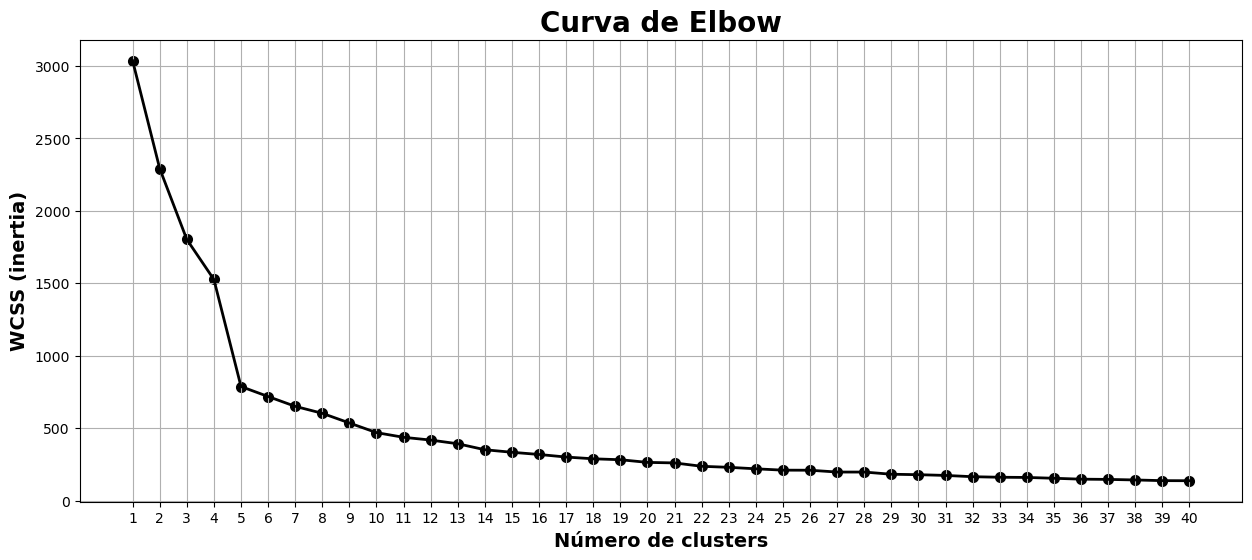

In [5]:
from sklearn.cluster import KMeans

l=[]
for k in range(1, 41):
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(Xsc)
    l.append(km.inertia_)

plt.figure(figsize=[15,6])
plt.title("Curva de Elbow", fontsize = 20, fontweight = 'bold')
plt.xlabel("Número de clusters", fontsize = 14, fontweight = 'bold')
plt.ylabel("WCSS (inertia)", fontsize = 14, fontweight = 'bold')
plt.plot(range(1, 1+len(l)), l, c = 'black', lw = 2)
plt.scatter(range(1, 1+len(l)), l, c = 'black', lw = 2)
plt.xticks(range(1,1+len(l)))
plt.grid()
plt.show()

In [6]:
km = KMeans(n_clusters=5, n_init='auto').fit(Xsc)

In [7]:
df['km5'] = km.predict(Xsc)
df.head()

,user,rec,freq,valor,km5
0,1,15.0,7.0,196.881015,2
1,2,51.0,6.0,162.408892,1
2,3,80.0,5.0,180.158644,1
3,4,38.0,4.0,156.048130,0
4,5,19.0,6.0,164.052067,2


In [8]:
#Descrição dos clusters de clientes
for i in range(km.n_clusters):
  print(f"Cluster {i + 1}:")
  print(df[df["km5"] == i].describe())
  print('-------------------------------------------------------')  

Cluster 1:
              user         rec        freq       valor    km5
count   259.000000  259.000000  259.000000  259.000000  259.0
mean    521.293436   21.563707    2.482625  105.872189    0.0
std     281.565142   13.235157    1.155828   53.794731    0.0
min       4.000000    1.000000    1.000000   12.891039    0.0
25%     273.000000   10.000000    1.000000   58.304608    0.0
50%     540.000000   22.000000    2.000000  108.930833    0.0
75%     765.000000   31.000000    4.000000  152.596721    0.0
max    1012.000000   45.000000    4.000000  199.941698    0.0
-------------------------------------------------------
Cluster 2:
              user         rec        freq       valor    km5
count   260.000000  260.000000  260.000000  260.000000  260.0
mean    525.296154   67.484615    6.407692  104.110882    1.0
std     305.907601   12.720478    1.116366   55.434070    0.0
min       2.000000   45.000000    5.000000   11.455050    1.0
25%     256.500000   56.750000    5.000000   55.089495

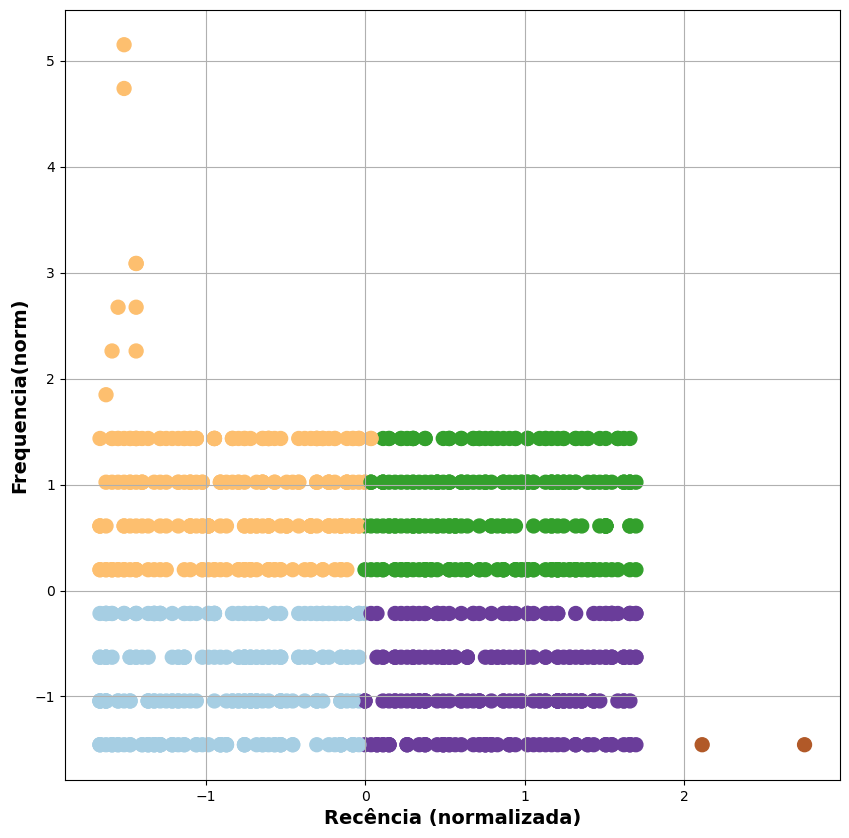

In [9]:
#visualização dos cluster
plt.figure(figsize=[10,10])
plt.scatter(Xsc[:,0], Xsc[:,1], c = df.km5, s = 100, cmap = plt.cm.Paired)
plt.xlabel("Recência (normalizada)", fontsize = 14, fontweight = 'bold')
plt.ylabel("Frequencia(norm)", fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()

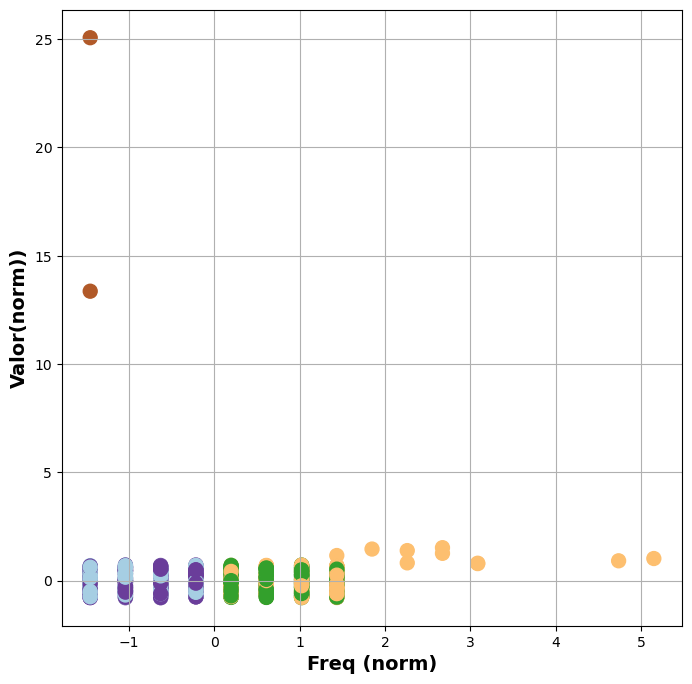

In [33]:
#visualização dos cluster Frequência x Valor gasto
plt.figure(figsize=[8,8])
plt.scatter(Xsc[:,1], Xsc[:,2], c = df.km5, s = 100, cmap = plt.cm.Paired)
plt.xlabel("Freq (norm)", fontsize = 14, fontweight = 'bold')
plt.ylabel("Valor(norm))", fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()

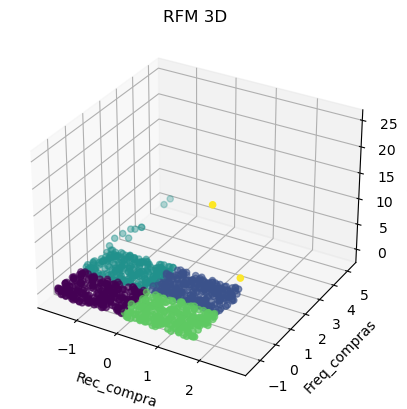

In [10]:
#Plot 3D dos dados
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xsc[:,0], Xsc[:,1], Xsc[:,2], c=df.km5, marker='o')
ax.set_xlabel('Rec_compra')
ax.set_ylabel('Freq_compras')
ax.set_zlabel('Valor')
ax.set_title('RFM 3D')
plt.show()

**Alguns pontos até aqui:**

**1**. Pesquisei sobre o Silhueta score, mas acredito que a definição com o elbow foi clara visualmente.

**2**. Na descrição dos cluster é possível notar que o cluster com apenas 2 clientes foi separado pelos valores 
       das compras, sendo que o menor valor do grupo é muito superior ao maior de qualquer outro cluster.
       
**3**.O gráfico 3D deixa a visualização dos cluster muito mais clara do que no plot 2D, entretanto há outliers 
      que poderiam ser removidos pra refinar a análise.

In [35]:
# Análise com DBScan
from sklearn.cluster import DBSCAN

In [37]:
db1 = DBSCAN(eps=0.3, min_samples=5).fit(Xsc)
db1

DBSCAN(eps=0.3)

In [38]:
db1.labels_

array([-1,  0,  1, ...,  1,  6,  6], dtype=int64)

In [39]:
df_scan = pd.DataFrame(np.c_[Xsc, db1.labels_], columns = ['R', 'F', 'V', 'label_db1'])

In [40]:
df_scan.head()

,R,F,V,label_db1
0,-1.136298,1.021841,0.698766,-1.0
1,0.224346,0.609025,0.422883,0.0
2,1.320421,0.196210,0.564936,1.0
3,-0.266997,-0.216606,0.371977,13.0
4,-0.985115,0.609025,0.436033,0.0


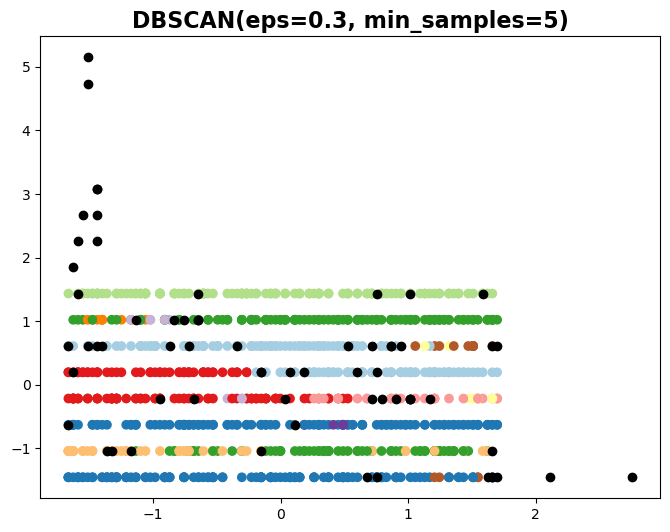

In [41]:
# Primeira simulação
plt.figure(figsize=[8,6])
plt.title("DBSCAN(eps=0.3, min_samples=5)", fontsize = 16, fontweight = 'bold')
plt.scatter(df_scan.loc[df_scan.label_db1 != -1].R, 
            df_scan.loc[df_scan.label_db1 != -1].F, 
            c = df_scan.loc[df_scan.label_db1 != -1].label_db1,
            cmap = plt.cm.Paired)
plt.scatter(df_scan.loc[df_scan.label_db1 == -1].R, 
            df_scan.loc[df_scan.label_db1 == -1].F, 
            c = 'black')
plt.show()

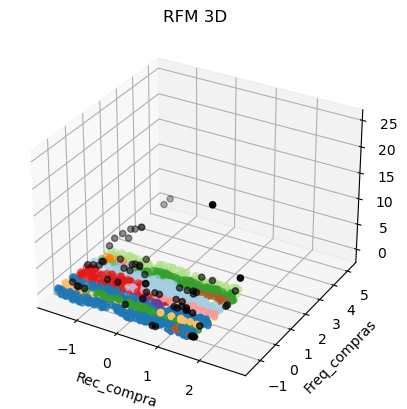

In [42]:
#Plot 3D dos dados
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_scan.loc[df_scan.label_db1 != -1].R, 
            df_scan.loc[df_scan.label_db1 != -1].F, 
            df_scan.loc[df_scan.label_db1 != -1].V,
            c = df_scan.loc[df_scan.label_db1 != -1].label_db1,
            cmap = plt.cm.Paired, marker='o')
ax.scatter(df_scan.loc[df_scan.label_db1 == -1].R, 
            df_scan.loc[df_scan.label_db1 == -1].F, 
            df_scan.loc[df_scan.label_db1 == -1].V,
            c = 'black', marker='o')
ax.set_xlabel('Rec_compra')
ax.set_ylabel('Freq_compras')
ax.set_zlabel('Valor')
ax.set_title('RFM 3D')
plt.show()

OS outliers estão atrapalhando na visualização dos clusters. Os plots abaixo serão sem as anomalias.

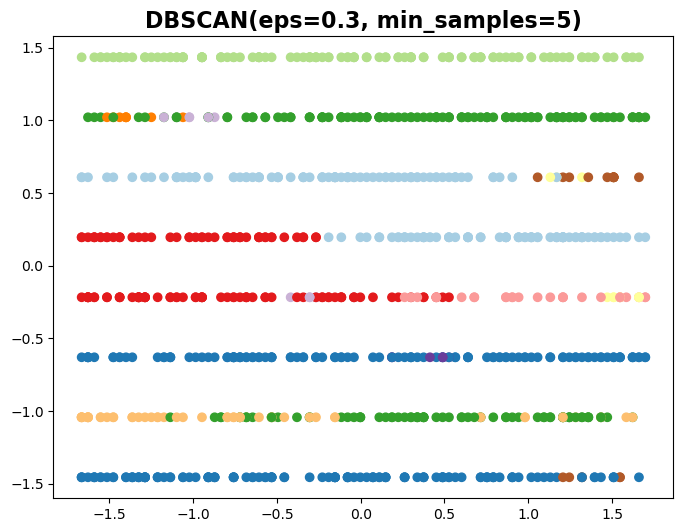

In [43]:
# Primeira simulação SEM OUTLIERS
plt.figure(figsize=[8,6])
plt.title("DBSCAN(eps=0.3, min_samples=5)", fontsize = 16, fontweight = 'bold')
plt.scatter(df_scan.loc[df_scan.label_db1 != -1].R, 
            df_scan.loc[df_scan.label_db1 != -1].F, 
            c = df_scan.loc[df_scan.label_db1 != -1].label_db1,
            cmap = plt.cm.Paired)
plt.show()

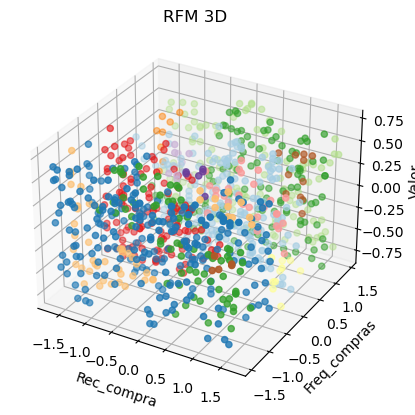

In [44]:
#Plot 3D dos dados SEM ANOMALIA
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_scan.loc[df_scan.label_db1 != -1].R, 
            df_scan.loc[df_scan.label_db1 != -1].F, 
            df_scan.loc[df_scan.label_db1 != -1].V,
            c = df_scan.loc[df_scan.label_db1 != -1].label_db1,
            cmap = plt.cm.Paired, marker='o')
ax.set_xlabel('Rec_compra')
ax.set_ylabel('Freq_compras')
ax.set_zlabel('Valor')
ax.set_title('RFM 3D')
plt.show()

Li em um artigo que o número ideal de samples é a dimensionalidade + 1, assim vou manter **min_samples=5** nas próximas análises, mas vou mudar o **eps** para ver o impacto na formação dos clusters.

In [45]:
db2 = DBSCAN(eps=0.4, min_samples=5).fit(Xsc)
db2

DBSCAN(eps=0.4)

In [46]:
df2_scan = pd.DataFrame(np.c_[Xsc, db2.labels_], columns = ['R', 'F', 'V', 'label_db2'])

In [47]:
df2_scan.head()

,R,F,V,label_db2
0,-1.136298,1.021841,0.698766,0.0
1,0.224346,0.609025,0.422883,1.0
2,1.320421,0.196210,0.564936,2.0
3,-0.266997,-0.216606,0.371977,3.0
4,-0.985115,0.609025,0.436033,1.0


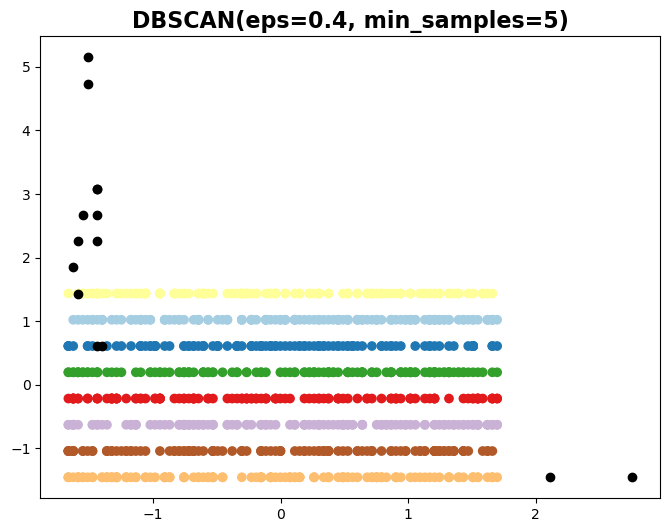

In [48]:
# 
plt.figure(figsize=[8,6])
plt.title("DBSCAN(eps=0.4, min_samples=5)", fontsize = 16, fontweight = 'bold')
plt.scatter(df2_scan.loc[df2_scan.label_db2 != -1].R, 
            df2_scan.loc[df2_scan.label_db2 != -1].F, 
            c = df2_scan.loc[df2_scan.label_db2 != -1].label_db2,
            cmap = plt.cm.Paired)
plt.scatter(df2_scan.loc[df2_scan.label_db2 == -1].R, 
            df2_scan.loc[df2_scan.label_db2 == -1].F, 
            c = 'black')
plt.show()

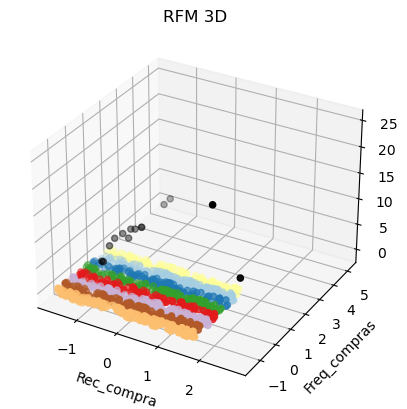

In [49]:
#Plot 3D dos dados
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df2_scan.loc[df2_scan.label_db2 != -1].R, 
            df2_scan.loc[df2_scan.label_db2 != -1].F, 
            df2_scan.loc[df2_scan.label_db2 != -1].V,
            c = df2_scan.loc[df2_scan.label_db2 != -1].label_db2,
            cmap = plt.cm.Paired, marker='o')
ax.scatter(df2_scan.loc[df2_scan.label_db2 == -1].R, 
            df2_scan.loc[df2_scan.label_db2 == -1].F, 
            df2_scan.loc[df2_scan.label_db2 == -1].V,
            c = 'black', marker='o')
ax.set_xlabel('Rec_compra')
ax.set_ylabel('Freq_compras')
ax.set_zlabel('Valor')
ax.set_title('RFM 3D')
plt.show()

A mudança de **eps** de 0,3 para 0,4 alterou muito mais o comportamento dos clusters do que achei que iria. Com **eps=0.4** houve uma divisão mais clara dos cluster, entratanto também ocorreu redução de outliers.

**RESULTADOS:**
    Considerando que de acorco com as análises acima os valores são similares entre todos os grupos, o diferencial recai sobre a análise de recência x frequência. Dessa maneira, o grupo que receberia mais esforços da equipe de vendas é o cluster 1 do método Kmeans. Este grupo apresenta a maior frequência de compras no período e a menor recência.
    Cluester representado pelo quadrante esquerdo superior no plot abaixo:

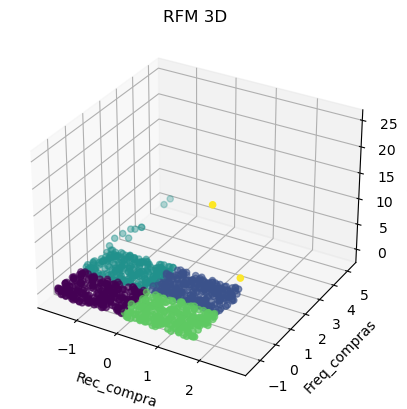

In [34]:
#Plot 3D dos dados
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xsc[:,0], Xsc[:,1], Xsc[:,2], c=df.km5, marker='o')
ax.set_xlabel('Rec_compra')
ax.set_ylabel('Freq_compras')
ax.set_zlabel('Valor')
ax.set_title('RFM 3D')
plt.show()

In [53]:
# A lista final de clientes mais valiosos para a empresa:
df_final = viz_xsc.query('rec <= 0 & freq >= 0')

In [57]:
df_final.head()

,rec,freq,valor_compra
0,-1.136298,1.021841,0.698766
4,-0.985115,0.609025,0.436033
9,-0.229202,1.021841,0.529027
13,-1.665437,1.434657,-0.352459
16,-0.266997,0.196210,0.178463
